In [ ]:
# hide
%load_ext autoreload
%autoreload 2

# Tutorial

Import modules:

In [ ]:
import ratioimage.ratio_images as ri
import ratioimage.plot_results as rp

Load in images and segmentations (label images):

In [ ]:
C0_imgs = ri.create_img_dict_from_folder(load_pattern="data/PercevalHR_data/imgs/*C0.tiff")
C1_imgs = ri.create_img_dict_from_folder(load_pattern="data/PercevalHR_data/imgs/*C1.tiff")
lab_imgs = ri.create_img_dict_from_folder(
    load_pattern="data/PercevalHR_data/segs/*.tif", label=True
)

In [ ]:
C0_imgs.keys()

dict_keys(['a1g01', 'a1g02', 'a1g03', 'a1g04', 'a2g01', 'a2g02', 'a2g03', 'a2g04'])

Display example pair of ratio images + segmentation using plotting function from `clonedetective`.

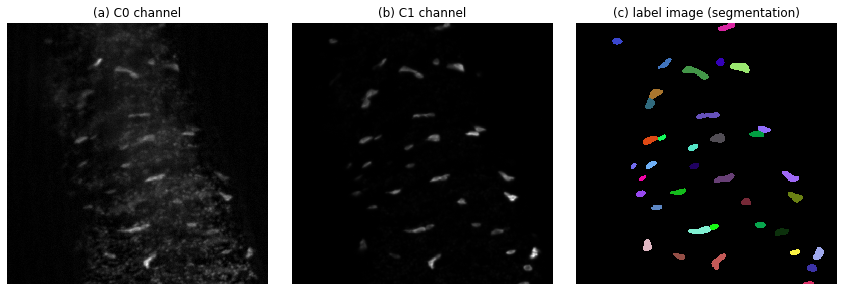

In [ ]:
from clonedetective.utils import plot_new_images

img_name = "a1g01"

plot_new_images(
    [C0_imgs[img_name], C1_imgs[img_name], lab_imgs[img_name]],
    ["C0 channel", "C1 channel", "label image (segmentation)"],
    interpolation="none",
)

Measure regionprops of images and calculate ratio of intensities. Output is a tidy dataframe

In [ ]:
df = ri.ratiometric_measure_region_props_to_tidy_df(C1_imgs, C0_imgs, lab_imgs)
df = ri.split_img_key_col_to_sample_id_and_replicates(
    df, sample_id_colname="genotype", split_regex=r"g"
)

df = ri.sample_id_to_categories(
    df, sample_id_colname="genotype", old_to_new_sample_ids={"a1": "ctrl", "a2": "mut"}
)

df.head()

,label,area,mean_intensity_num,centroid-0,centroid-1,img_key,mean_intensity_denom,ratio_mean_int,genotype,rep_id
0,1,342,0.017960,7.400585,295.084795,a1g01,0.010094,1.779309,ctrl,01
1,2,200,0.012017,35.585000,80.495000,a1g01,0.006473,1.856478,ctrl,01
2,3,269,0.013259,79.152416,174.858736,a1g01,0.027961,0.474173,ctrl,01
3,4,213,0.013988,76.201878,282.995305,a1g01,0.019588,0.714101,ctrl,01
4,5,546,0.025333,86.560440,322.816850,a1g01,0.013664,1.854012,ctrl,01


Plot results - aggregated per cell:

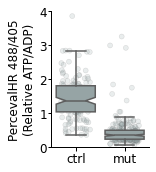

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.75, 2.5))

rp.tidy_create_strip_box_plot(
    x="genotype",
    y="ratio_mean_int",
    data=df,
    ax=ax,
    y_axis_limit=4,
    y_label="PercevalHR 488/405\n(Relative ATP/ADP)",
    palette=["#95a5a6", "#95a5a6"],
)

Plot results - aggregated per image/replicate:

In [ ]:
grouped_df = (
    df.groupby(["genotype", "rep_id"]).agg({"ratio_mean_int": "mean"}).reset_index()
)

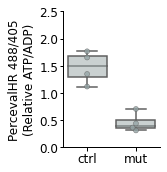

In [ ]:
fig, ax = plt.subplots(figsize=(1.75, 2.5))

rp.tidy_create_swarm_box_plot(
    x="genotype",
    y="ratio_mean_int",
    ax=ax,
    data=grouped_df,
    y_axis_limit=2.5,
    y_label="PercevalHR 488/405\n(Relative ATP/ADP)",
    palette=["#95a5a6", "#95a5a6"],
)

Create ratiometric images:

In [ ]:
ratio_imgs = ri.create_dict_of_ratio_images(C1_imgs, C0_imgs, lab_imgs)

In [ ]:
ratio_imgs.keys()

dict_keys(['a1g01', 'a1g02', 'a1g03', 'a1g04', 'a2g01', 'a2g02', 'a2g03', 'a2g04'])

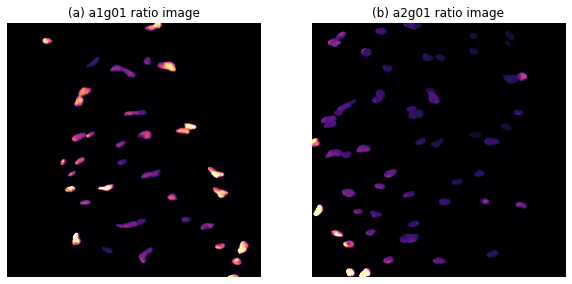

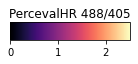

In [ ]:
plot_new_images(
    [ratio_imgs['a1g01'], ratio_imgs['a2g01']],
    ["a1g01 ratio image", "a2g01 ratio image"],
    img_cmap="magma",
    vmax=2.5,
    figure_shape=(1, 2),
    figure_size=(10, 5),
    colorbar=True,
    colorbar_title="PercevalHR 488/405"
)